# Singular Value Decomposition
### Jake Lee

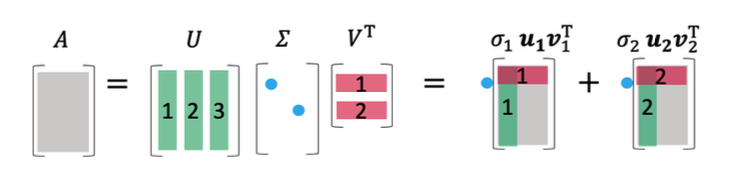

The goal of this notebook is to learn how to compute Singular Value Decomposition (SVD) using python. We will skip basic python matrix operations and get straight into SVD, some example computations, and a few applications to image compressing. 

Fortunately, the [NumPy Library](https://numpy.org/devdocs/reference/routines.linalg.html) contains all the goods we need for SVD.

In [1]:
import numpy as np

## Singular Value Decomposition
 
Recall, $ A = U \Sigma V^{T} $:
 - U, Orthonormal Singular Vectors (ouputs of A)
 - $ \Sigma $ or S, Diagonal Matrix (positive singular values of A)
 - V, Orthormal Singular Vectors to A (inputs to A)

The function `numpy.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)`computes SVD for us: 
 - `a`: Input matrix (array-like). The matrix for which the SVD is computed.
 - `full_matrices`: (Optional) If True (default), U and V have the shapes (M, M) and (N, N), respectively. If False, the shapes are (M, K) and (K, N), where K = min(M, N).
 - `compute_uv`: (Optional) If True (default), compute the full SVD. If False, only the singular values are computed.
 - `hermitian`: (Optional) If True, a is assumed to be Hermitian (conjugate symmetric). Default is False.

The function will return the following: 

 - `U`: Unitary matrix having left singular vectors if compute_uv is True. Shape is (M, M) or (M, K) depending on full_matrices.
 - `S`: 1-D array of singular values, sorted in non-increasing order.
 - `V`: Unitary matrix having right singular vectors if compute_uv is True. Shape is (N, N) or (K, N) depending on full_matrices.


[NumPy SVD Documentation](https://numpy.org/devdocs/reference/generated/numpy.linalg.svd.html#numpy.linalg.svd)

## Example 1

In [2]:
A = np.asarray([
[4, 11, 14],
[8, 7, -2],   
])

U, S, V = np.linalg.svd(A, full_matrices=False)

A_reconstructed = U @ np.diag(S) @ V

print("A:")
print(A)

print ("\n", "A size:", A.shape)

print("\n", "U:")
print(U)

print("\n", "S:")
print(np.diag(S))

print("\n", "V:")
print(V)

print("\nRecontructed A:")
print(A_reconstructed)

A:
[[ 4 11 14]
 [ 8  7 -2]]

 A size: (2, 3)

 U:
[[-0.9486833  -0.31622777]
 [-0.31622777  0.9486833 ]]

 S:
[[18.97366596  0.        ]
 [ 0.          9.48683298]]

 V:
[[-0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]]

Recontructed A:
[[ 4. 11. 14.]
 [ 8.  7. -2.]]


## Example 2 - Random Matrix

In [3]:
a = 1
b = 10
m = np.random.randint(1,11)
n = np.random.randint(1,11)

A2 = np.random.randint(a, b + 1, size=(m, n))

U, S, V = np.linalg.svd(A2, full_matrices=False) # for computation

A_reconstructed = U @ np.diag(S) @ V

print("A:")
print(A2)
print ("\nA size:", A2.shape)

print("\nU:")
print(U)

print("\nS:")
print(np.diag(S))

print("\nV:")
print(V)

print("\nRecontructed A:")
print(A_reconstructed)

A:
[[ 4  7  1  6  4 10]
 [ 3  5  9 10  7  5]
 [ 3  2  4  9  8  9]
 [ 8  4  2  2  4  3]
 [ 6  2  3  8  2  4]
 [ 8  3  3  2  5  8]
 [ 3  3  1  6 10  1]
 [ 6  4  8 10  1  4]]

A size: (8, 6)

U:
[[-0.37006939  0.39953345 -0.08771909 -0.55067308 -0.54905388  0.29494602]
 [-0.44823867 -0.45180017  0.14517759 -0.01440623  0.25035879  0.54446516]
 [-0.42364572  0.01084403  0.32360646 -0.40380044  0.36537146 -0.43608923]
 [-0.24849941  0.35133466 -0.17662796  0.55813113 -0.09878772  0.15990665]
 [-0.30137405 -0.11536957 -0.24885402  0.11043718 -0.28294132 -0.63014201]
 [-0.32310136  0.53190713 -0.19679592  0.15224506  0.5437727   0.0036222 ]
 [-0.28117117  0.01333081  0.70643863  0.41725844 -0.32741511 -0.06074648]
 [-0.38291652 -0.46506231 -0.48538414  0.11183436 -0.09828425 -0.00619439]]

S:
[[35.89561042  0.          0.          0.          0.          0.        ]
 [ 0.         10.34132823  0.          0.          0.          0.        ]
 [ 0.          0.          9.23171137  0.          0.

# Matrix(Image) Approximation using SVD
Here we showcase how constraining the matrix rank (singular values) affects the reconstruction of an image split up by SVD. 

The SVD truncation results in a compression of the original image because only the r columns of U and V, along with the first r diagonal elements of $\Sigma$ are used in the reconstruction.

This first image is only 4 KB (34,116 bytes) or 72 pixels/inch.

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

A = imread('Strang.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

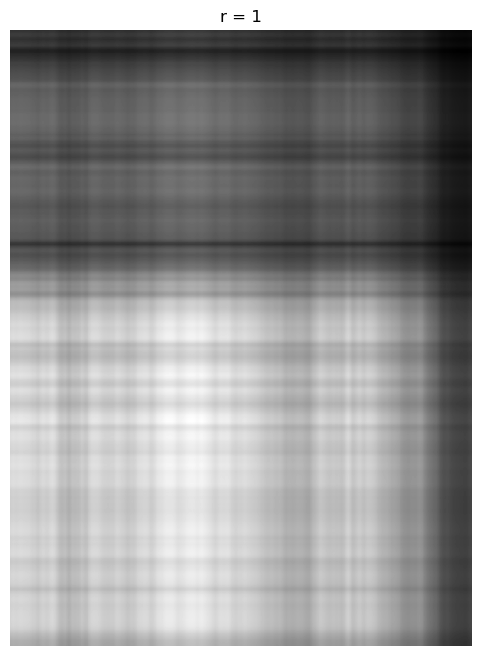

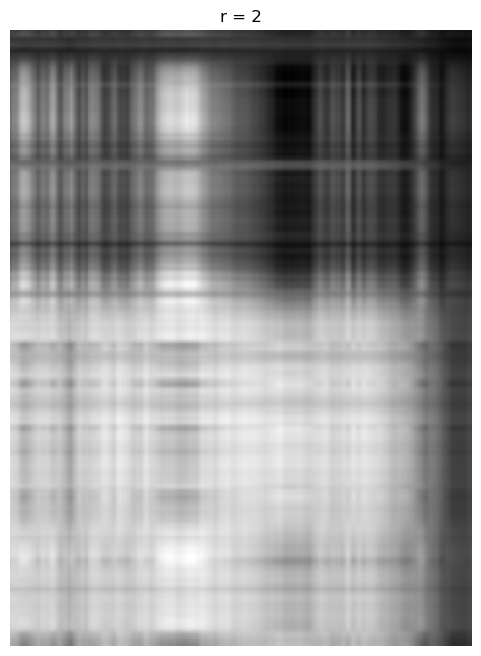

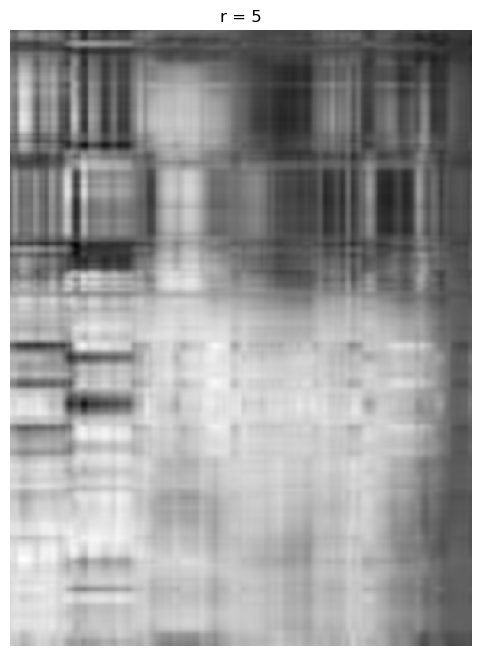

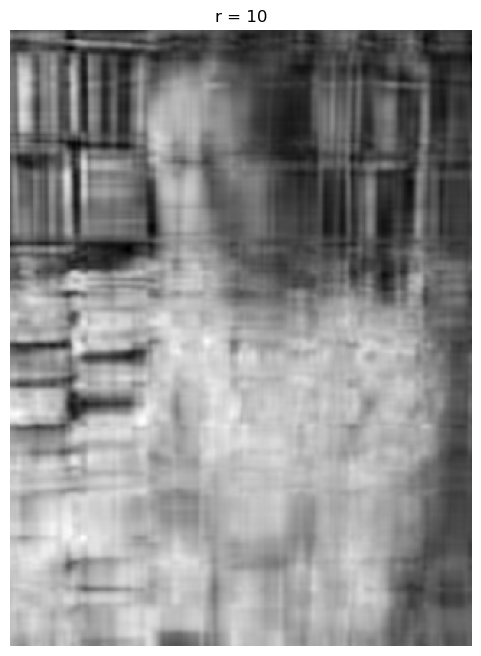

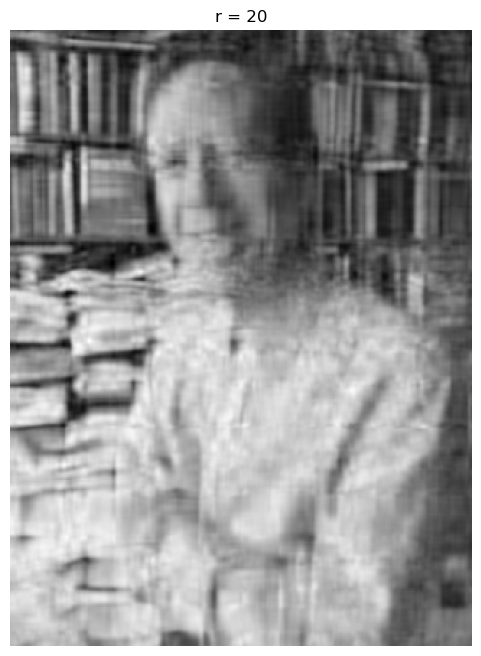

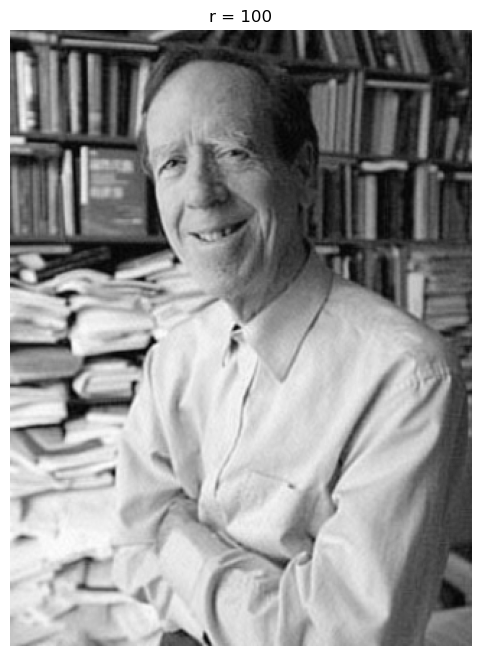

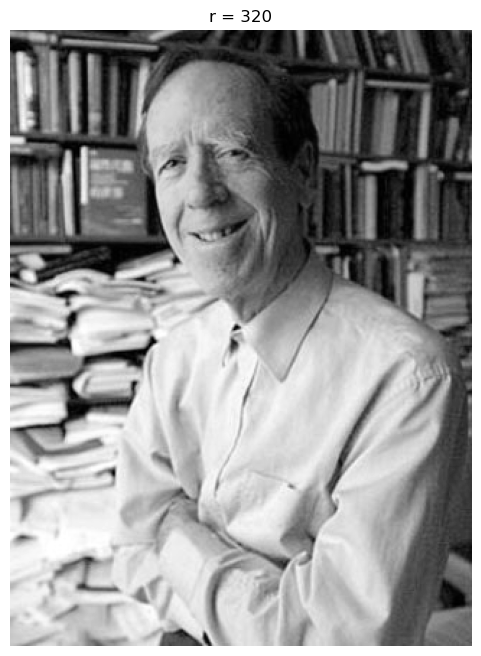

In [5]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (1, 2, 5, 10, 20, 100, X.shape[1]):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

## 35mm Film - 548 KB (547,877 bytes)

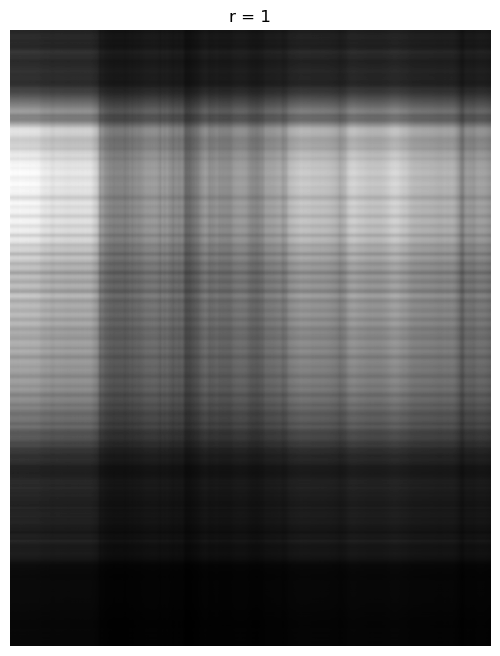

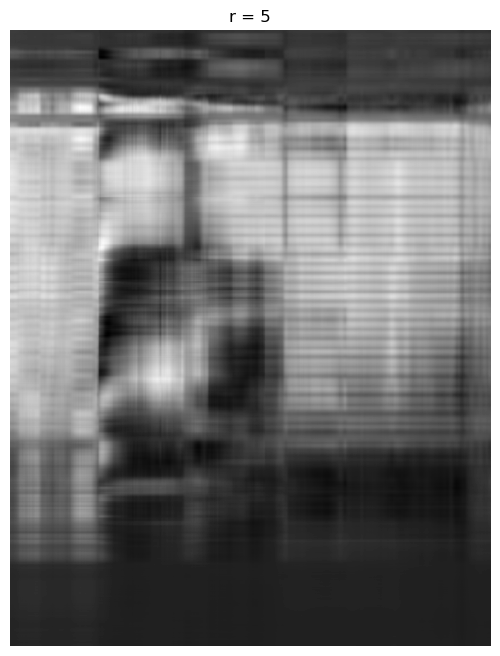

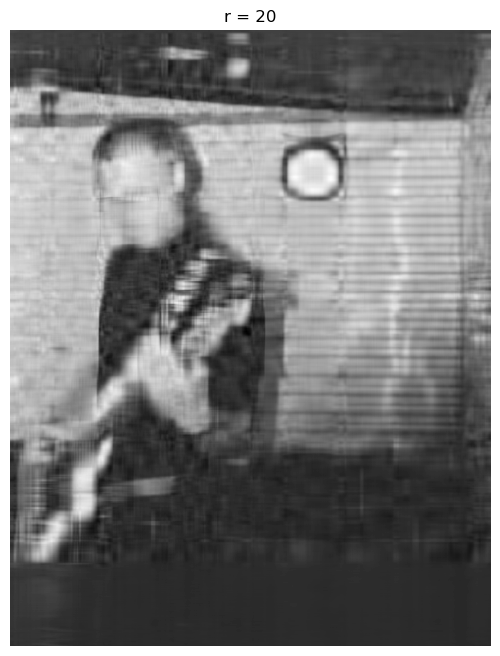

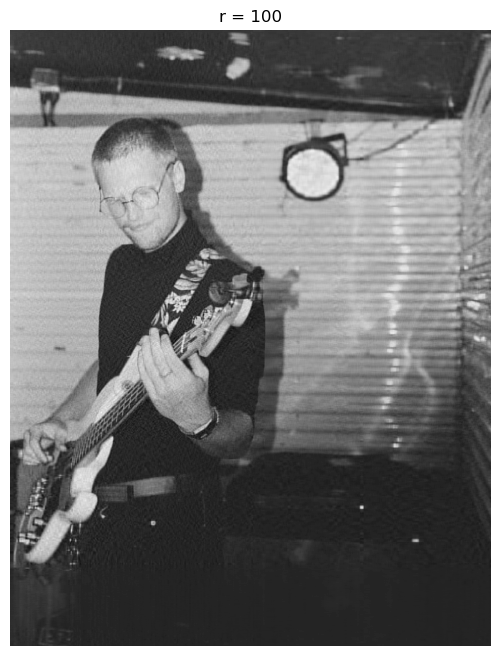

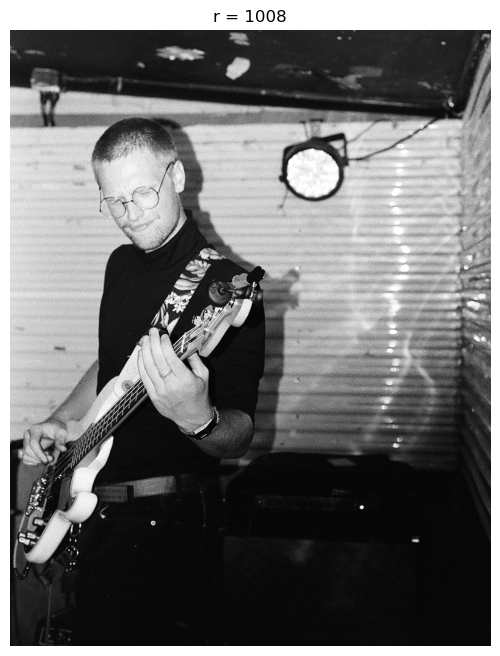

In [6]:
plt.rcParams['figure.figsize'] = [16, 8]
B = imread('KilbyCourt.JPG')
X2 = np.mean(B, -1); # Convert RGB to grayscale
U, S, VT = np.linalg.svd(X2,full_matrices=False)
S = np.diag(S)

j = 0
for r in (1, 5, 20, 100, X2.shape[1]):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

##  DSLR - 3.9 MB (3,891,890 bytes)

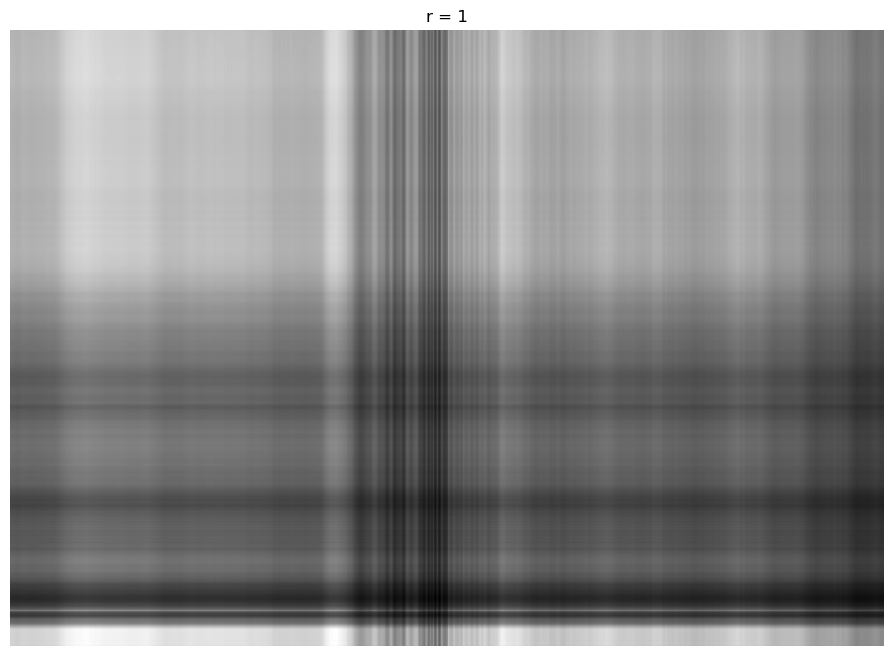

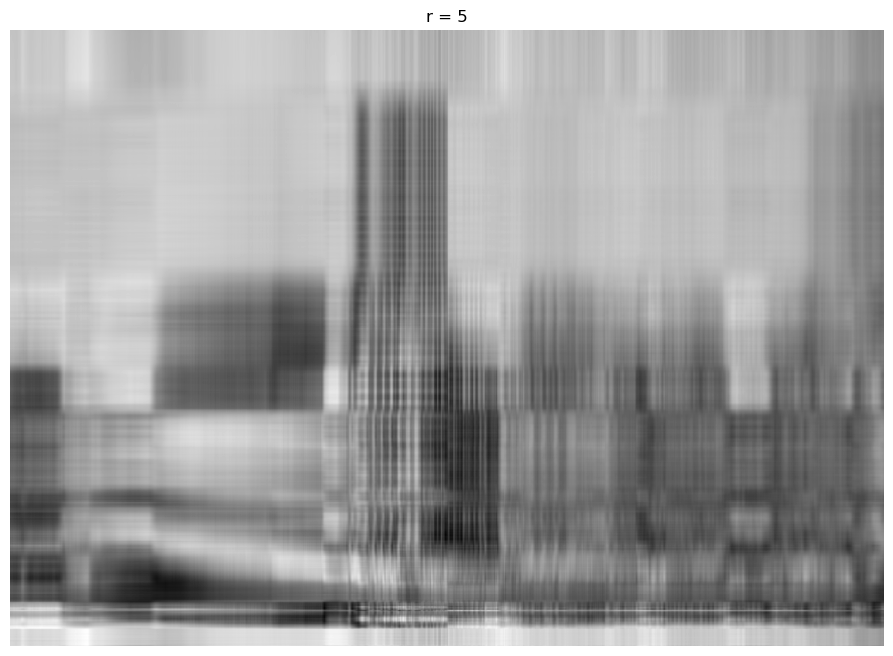

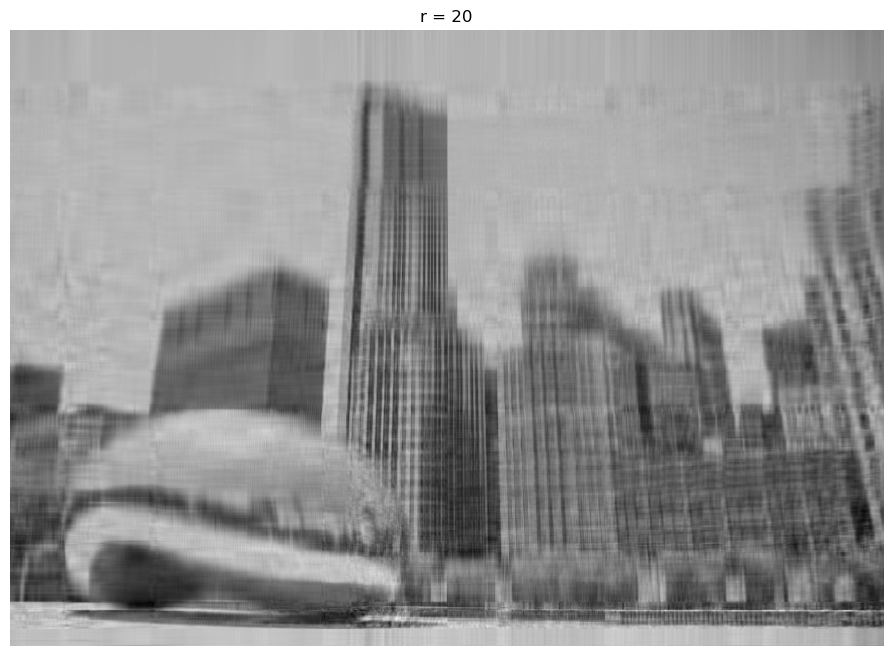

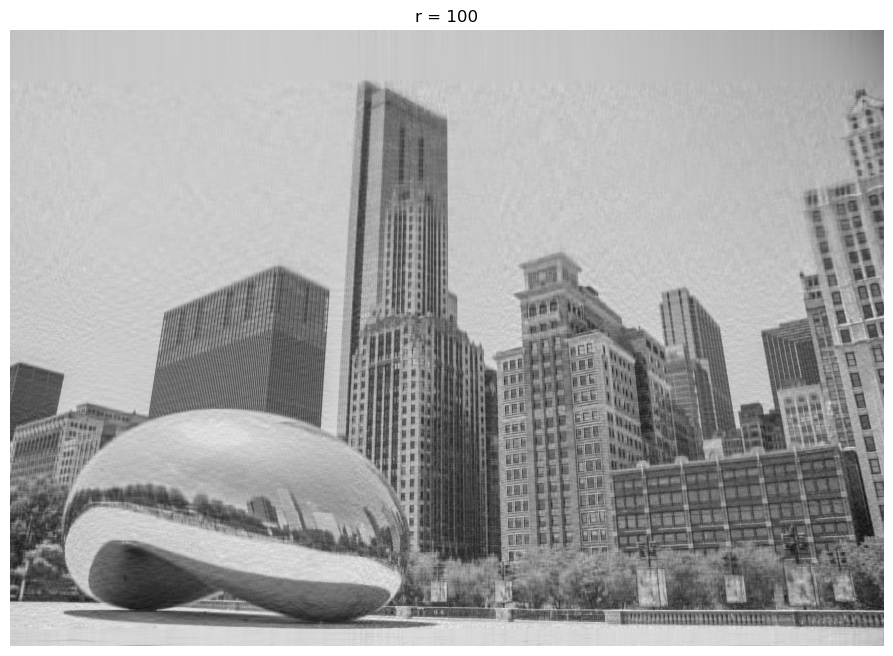

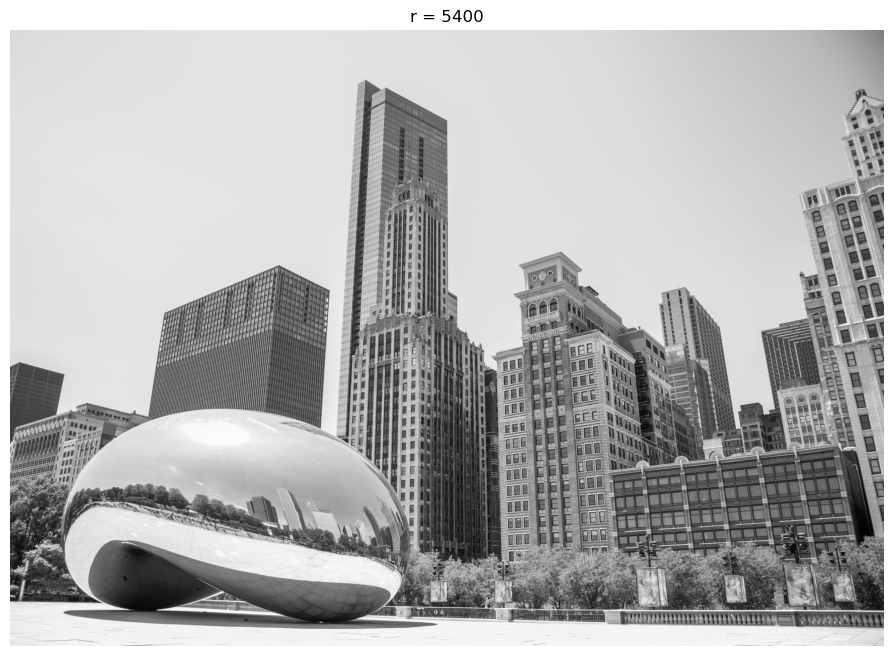

In [7]:
plt.rcParams['figure.figsize'] = [16, 8]
C = imread('CloudGateB&W.JPG')
X3 = np.mean(C, -1); # Convert RGB to grayscale
U, S, VT = np.linalg.svd(X3,full_matrices=False)
S = np.diag(S)

j = 0
for r in (1, 5, 20, 100, X3.shape[1]):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()